In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)
(20,) (50,) (20, 50)
(50,)


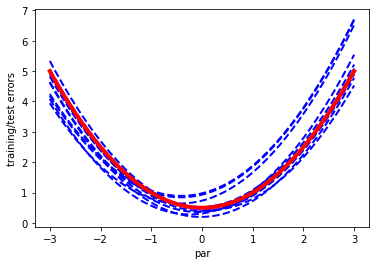

In [10]:
par = np.linspace(-3, 3, 50)
te_err = (1 + par **2) / 2 # テスト誤差

# テスト誤差をプロット
for i in range(10):
    z = np.random.randn(20)
    #     トレーニング誤差
    print(z.shape, par.shape, np.subtract.outer(z, par).shape)
#     2乗損失関数を利用する(1/2(z-θ)**2)
    trerr = np.mean(np.subtract.outer(z, par) ** 2 / 2, axis = 0)
    print(trerr.shape)
    plt.plot(par, trerr, 'b--', linewidth=2)

plt.xlabel("par")
plt.ylabel("training/test errors")
plt.plot(par, te_err, "r-", linewidth = 4)
plt.show();
    
    

In [54]:
# データ数n, K重交差検証
n = 100
K = 10

x = np.random.uniform(-2, 2, n)
y = np.sin(2 * np.pi * x) / x + np.random.normal(scale=0.5, size=n)

# データをグループ分け
# NumPyの関数np.tile()を使うと配列ndarrayを任意のタイル状に繰り返し並べた新たなndarrayを生成できる。
cv_idx = np.tile(np.arange(K), int(np.ceil(n/K)))[:n]
maxdepths = np.arange(2, 10)
cverr = np.array([])

In [55]:
for mp in maxdepths:
    cverr_lambda = np.array([])
    for k in range(K):
        tr_idx = (cv_idx != k)
        te_idx = (cv_idx == k)
        cvx = x[tr_idx]
        cvy = y[tr_idx]
        dtreg = DecisionTreeRegressor(max_depth=mp)
        dtreg.fit(np.array([cvx]).T, cvy)
        ypred = dtreg.predict(np.array([x[te_idx]]).T)
        #   CV誤差の計算
        cverr_lambda = np.append(cverr_lambda, np.mean((y[te_idx] - ypred)**2/2))
#         print(cverr_lambda)
    cverr = np.append(cverr, np.mean(cverr_lambda))

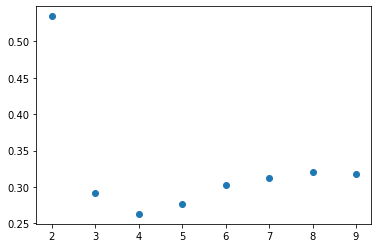

In [56]:
plt.scatter(maxdepths, cverr)
plt.show()

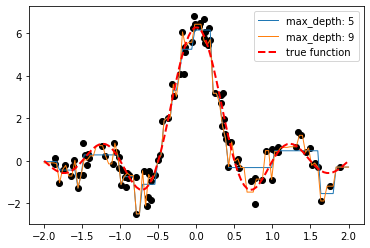

In [57]:
# データ生成
n = 100
x = np.random.uniform(-2, 2, n)
y = np.sin(2 * np.pi * x)/x + np.random.normal(scale=0.5, size=n)
tx = np.linspace(-2, 2, 100) # 予測点
maxdepths = np.array([5, 9])
for mp in maxdepths:
    dtreg = DecisionTreeRegressor(max_depth=mp)
    dtreg.fit(np.array([x]).T, y)
    ypred = dtreg.predict(np.array([tx]).T)
    #     予測値のプロット
    plt.plot(tx, ypred, lw = 1, label = "max_depth: "+str(mp))
    
plt.plot(tx, np.sin(2 * np.pi*tx)/tx, 'r--', lw = 2, label="true function")
plt.scatter(x, y, c = 'k')
plt.legend()
plt.show()

In [58]:
n = 100
xp = np.random.normal(loc = 1, size = n * 2).reshape(n, 2)
xn= np.random.normal(size = n * 2).reshape(n, 2)

In [59]:
# x = (x1, x2)のデータが与えられたとき、F1 = x1, F2 = x1 + x2のAUCを考える
# F1
np.mean(np.subtract.outer(xp[:, 0], xn[:, 0]) >= 0)

0.786

In [67]:
# F2
np.mean(np.subtract.outer(np.sum(xp, 1), np.sum(xn, 1)) >= 0)

0.857888

In [61]:
n = 1000 # データ数
xp = np.random.normal(loc = 1, size = n*2).reshape(n, 2)
xn = np.random.normal(size = n*2).reshape(n, 2)


In [65]:
# F1
np.mean(np.subtract.outer(xp[:, 0], xn[:, 0])>=0)

0.774759

In [68]:
# F2
np.mean(np.subtract.outer(np.sum(xp, 1), np.sum(xn, 1))>=0)

0.857888

In [69]:
# scipyを利用した実際の面積を求めることによるAUC
from scipy import integrate

In [70]:
def fpr(c):
    return (1-stats.norm.cdf(c))

def tpr(c):
    return (1-stats.norm.cdf(c, loc=1))

In [71]:
c = np.arange(-10, 10, 0.01)

In [72]:
# F1のAUC計算
integrate.cumtrapz(tpr(c)[::-1], fpr(c)[::-1])[-1]

0.7602481081209274

In [73]:
# F2のAUC計算
def fpr(c):
    return (1-stats.norm.cdf(c, scale=np.sqrt(2)))

def tpr(c):
    return (1 - stats.norm.cdf(c, loc = 2, scale = np.sqrt(2)))

In [74]:
integrate.cumtrapz(tpr(c)[::-1], fpr(c)[::-1])[-1]

0.8413437378589432